In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_finder_image

In [3]:
# import exoarch
# kic = exoarch.KICatalog().df

In [4]:
# kic_tgas = pd.read_csv("data/kic_tgas.csv")

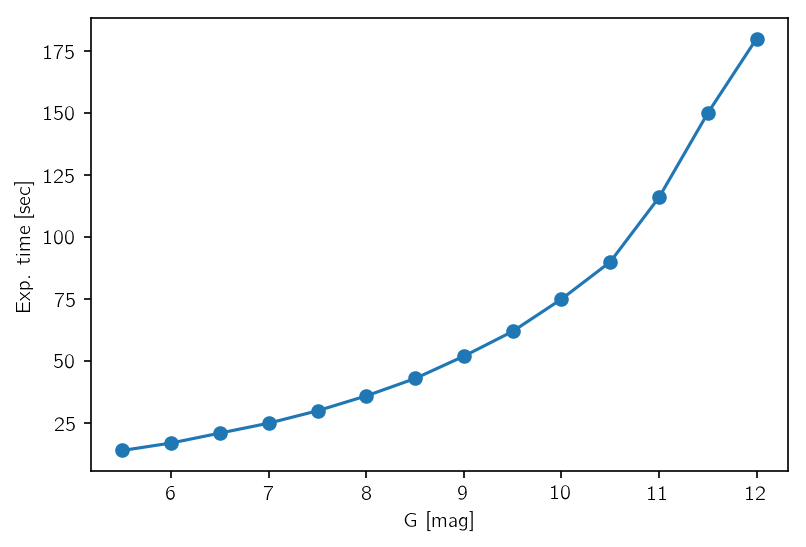

In [5]:
# return exptime in seconds given G mag
mag2exp = interpolate.interp1d(
    np.linspace(5.5, 12.0, 14), [14, 17, 21, 25, 30, 36, 43, 52, 62, 75, 90, 116, 150, 180],
    fill_value='extrapolate')

mags = np.linspace(5.5, 12.0, 14)
plt.plot(mags, mag2exp(mags), 'o-');
plt.xlabel('G [mag]')
plt.ylabel('Exp. time [sec]');

In [6]:
# targets = pd.read_csv("data/targets-top.list", delim_whitespace=True, header=None)
targets = pd.read_csv("data/targets-small-sep.csv")

In [7]:
for _, row in targets.iterrows():
    kepid = row.kepid
    print(kepid)
    
    ra, dec = row.ra_x, row.dec_x
    mag = row.tgas_phot_g_mean_mag

#     if np.any(kepid == kic_tgas.kepid):
#         star = kic_tgas[kic_tgas.kepid == kepid].iloc[0]
#         ra, dec = star.ra, star.dec
#         mag = star.tgas_phot_g_mean_mag
#     else:
#         star = kic[kic.kepid == kepid].iloc[0]
#         ra, dec = star.ra, star.dec
#         mag = star.kepmag

    exp_time = float(mag2exp(mag))
    print(kepid, mag, exp_time, ra, dec)

    
    result = input()
    if result == "c":
        ax, _ = plot_finder_image(SkyCoord(ra=ra*u.degree, dec=dec*u.degree),
                                  fov_radius=3*u.arcmin, reticle=True)
        ax.set_title("{0}; {1:.1f} mag; exp = {2:.0f}s".format(kepid, mag, exp_time))
        plt.show()

12069449
12069449 6.020773457848183 17.16618766278546 295.46567149752116 50.51684681362882


KeyboardInterrupt: 